# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
# WRITE YOUR CODE HERE

getwd()

setwd("/Users/jjimmyk/downloads")
unclean_data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

library(tidyverse)

d1 <- data.frame(Subject = unclean_data$Subject, Gender = unclean_data$Gender, Flanker = unclean_data$Flanker_Unadj, Intracranial_Vol = unclean_data$FS_IntraCranial_Vol, White_Matter = unclean_data$FS_Tot_WM_Vol, Grey_Matter = unclean_data$FS_Total_GM_Vol)

d1 <- na.omit(d1)

head(d1)


[1] "/Users/jjimmyk/Downloads/DataSciencePsychNeuro-master 4/Homeworks"

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker,Intracranial_Vol,White_Matter,Grey_Matter
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

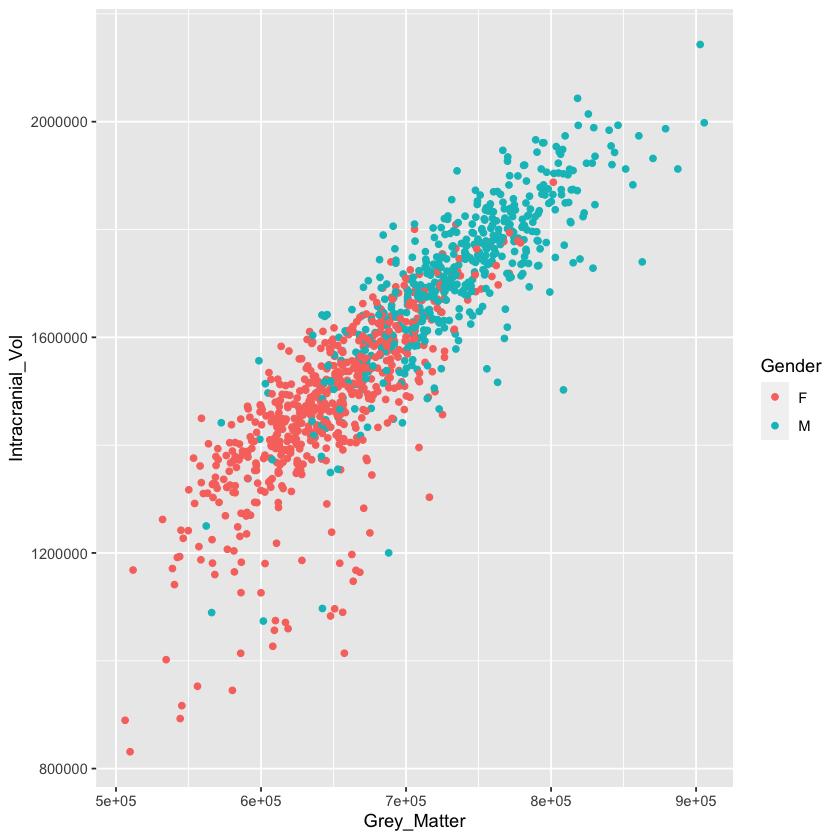

In [2]:
# WRITE YOUR CODE HERE

ggplot(aes(Grey_Matter, Intracranial_Vol, color = Gender), data = d1) +
  geom_point()

What patterns do you observe in the scatter plot?

>At first glance, there appears to be a positive, linear relationship between grey matter and intracranial volume. Also, males seem to on average have more grey matter and intracranial volume than females do.
> 

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [3]:
## First, we need to make Gender a numeric variable. 0 = Female, 1 = Male.

d1$Gender <- factor(d1$Gender, levels = c("F", "M"), labels = c("0", "1"))

head(d1)

#Make the model.
glm.fit <- glm(Gender~White_Matter+Grey_Matter+Intracranial_Vol, data = d1, family = binomial)
glm.fit
summary(glm.fit)


,Subject,Gender,Flanker,Intracranial_Vol,White_Matter,Grey_Matter
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
2,100206,1,130.42,1864518,543134,807245
3,100307,0,112.56,1512540,407292,664124
4,100408,1,121.18,1684117,500417,726206
5,100610,1,126.53,1816044,512946,762308
6,101006,0,101.85,1437868,429449,579632
7,101107,1,107.04,1512727,416995,665024



Call:  glm(formula = Gender ~ White_Matter + Grey_Matter + Intracranial_Vol, 
    family = binomial, data = d1)

Coefficients:
     (Intercept)      White_Matter       Grey_Matter  Intracranial_Vol  
      -2.262e+01         2.140e-06         1.959e-05         5.020e-06  

Degrees of Freedom: 1112 Total (i.e. Null);  1109 Residual
Null Deviance:	    1534 
Residual Deviance: 919.9 	AIC: 927.9


Call:
glm(formula = Gender ~ White_Matter + Grey_Matter + Intracranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
White_Matter      2.140e-06  3.059e-06   0.699    0.484    
Grey_Matter       1.959e-05  3.145e-06   6.229 4.70e-10 ***
Intracranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Grey matter and intracranial volume are significantly associated with gender, but white matter is not.
> 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [5]:
Gender <- d1$Gender

# predict function intakes the model, d1 is dataset, type "response" means 
# prob that a given response occurs (probability of response 1 vs 0)
glm.probs = predict(glm.fit, d1, type = "response")

# make a vector of 0s the length of the number of rows in d1
glm.pred = rep(0, nrow(d1))

# All cells of glm.pred in which glm.probs>0.5, glm.pred cell = 1
glm.pred[glm.probs>0.5]=1

confusion_df = data.frame(glm.pred, Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted   0   1
        0 516 110
        1  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?


> 82.03% prediction accuracy.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.



The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//RtmpdNXVVH/downloaded_packages
[1] 0.8203055

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8203055 -0.002383648 0.004643052
[1] 0.004643052


2.5%     97.5% 
0.8068284 0.8247978

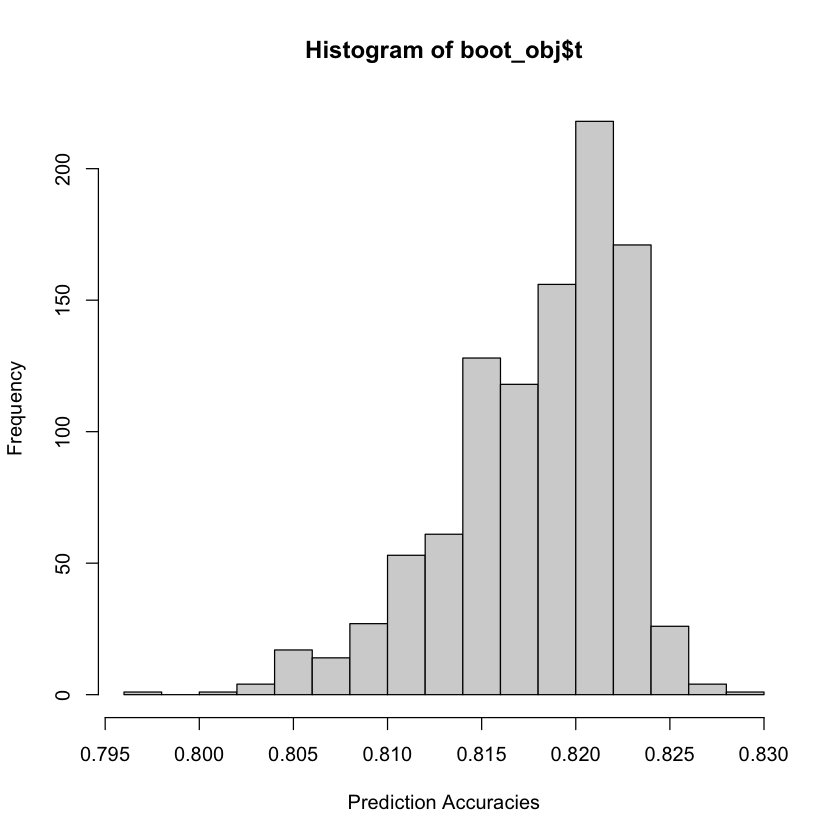

In [7]:
# WRITE YOUR CODE HERE
install.packages("ISLR")
library(ISLR)
library(boot)

boot.fn <- function(data, index) {
  boot_fit <- glm(Gender~White_Matter+Grey_Matter+Intracranial_Vol, data = d1, family = binomial, subset = index)
  Gender <- d1$Gender
  glm.probs = predict(boot_fit, d1, type = "response")
  glm.pred = rep(0, nrow(d1))
  glm.pred[glm.probs>0.5]=1
  confusion_df = data.frame(glm.pred, Gender)
  colnames(confusion_df) = c('predicted', 'actual')
  return(mean(confusion_df$predicted == confusion_df$actual))
}

result_bootfn <- boot.fn(d1, 1:1113)

print(boot.fn(d1, 1:1113))

boot_obj = boot(d1, boot.fn, R=1000) #R=repetitions, randomly sample from the dataset
# with replacement
print(boot_obj)

plot.new()

standard_error <- sd(boot_obj$t)

print(standard_error)

## 95% of samples lie between the above values; this is the CI.
quantile(boot_obj$t, c(.025,.975))

hist(boot_obj$t, xlab="Prediction Accuracies") #we get a distribution of all of the estimates



How robust is the prediction accuracy of the full model?

The prediction accuracy is quite robust, with a 95% CI spanning from .795 to .83 accuracy.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”
Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”
Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”
Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”
Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”
Warning message in model.respo

(Intercept)   Grey_Matter 
 1.478735e+00 -3.383309e-08

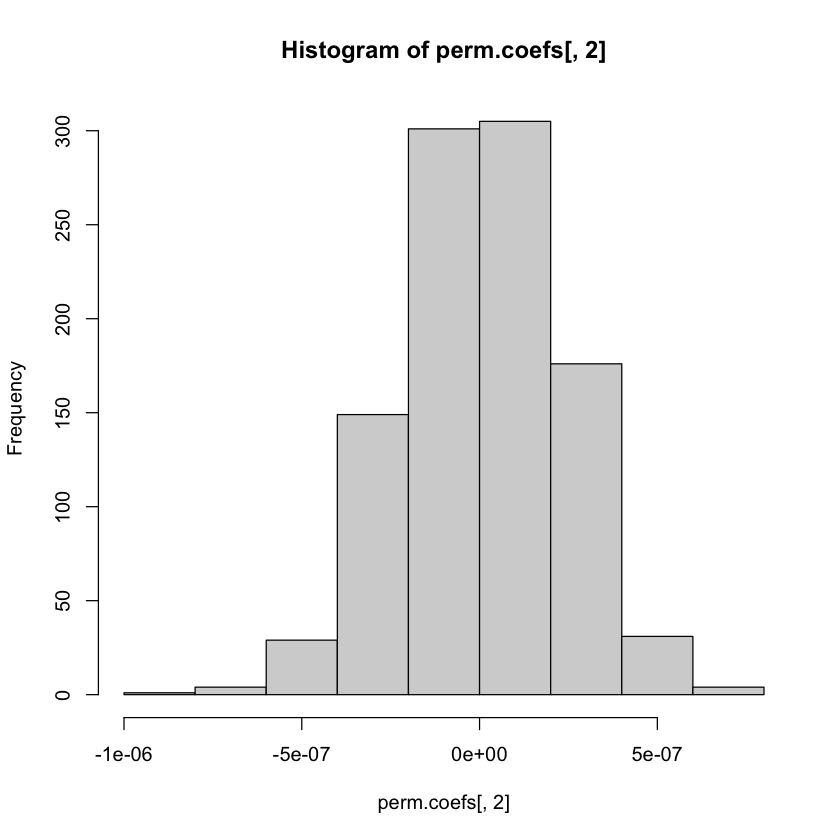

In [8]:
# WRITE YOUR CODE HERE
permD1 = d1

#Define R as 1000 iterations.
R=1000

#Make an output matrix to store the result, filled with NAs to start.
perm.coefs=matrix(NA,nrow = R, ncol = 2)

#Make a for loop to scramble observations using the sample function.
for (i in 1:R){
  permD1$Grey_Matter=d1$Grey_Matter[sample(1113)] #This is a scrambled sample of d1$Grey_Matter
  perm.coefs[i,]=coef(lm(Gender~Grey_Matter, data = permD1)) #This returns coefficients for linear model.
}

hist(perm.coefs[,2])

abline(hist(perm.coefs[,2]))

perm.real = coef(lm(Gender~Grey_Matter, data = permD1))
perm.real


How much does the grey matter volume influence the prediction accuracy of the model?

> Grey matter does not appear to influence the prediction accuracy much, as its coefficient is 0.0000001142992.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

A permutation test uses sampling without replacement. Permutation tests are used to calculate the probability that a given relationship is observed given that the Ho is true.

Bootstrapping uses sampling with replacement. It is used to explore the range of values that you can expect for a statistic given the variability in your data.

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
Marc Levesque